In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
path = 'data.csv'
df = pd.read_csv(path)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29138 entries, 0 to 29137
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   N°         29138 non-null  int64 
 1   MODALIDAD  29138 non-null  object
 2   DNI        29138 non-null  int64 
 3   REGION     29138 non-null  object
 4   PJ ENP     29138 non-null  int64 
 5   PJ CP      29138 non-null  int64 
 6   PJ FIN     29138 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.6+ MB


In [255]:
x,y = df.shape
print('Cantidad de postulantes preseleccionados:',x)

Cantidad de postulantes: 29138


##### Cantidad de Postulantes por Región

In [259]:
'''
Se crea una función para realizar gráficos por un campo categórico de una columna
'''

def grafica_por_categoria(df, category, x_size=12, y_size=4, titulo='Frecuencia por {category}'):
    # Contar las frecuencias de cada categoría
    counts = df[category].value_counts().sort_values(ascending=True)

    # Crear una figura con tamaño especifico
    plt.figure(figsize=(x_size, y_size))

    # Crear el gráfico de barras horizontales
    ax = counts.plot(kind='barh', width=0.8)

    ax.set_ylabel('') # Eliminar el titulo del eje Y
    ax.set_xticklabels([]) # Elimina las marcas del eje X

    # Agregar los valores sobre las barras
    for p in ax.patches:
        ax.text(p.get_width() + 0.2, p.get_y() + p.get_height() / 2,
                f'{p.get_width():.0f}', va='center')

    # Eliminar los bordes (spines)
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Agregar un titulo al grafico
    ax.set_title(titulo, fontsize=12)

    # Mostrar el gráfico
    plt.show()


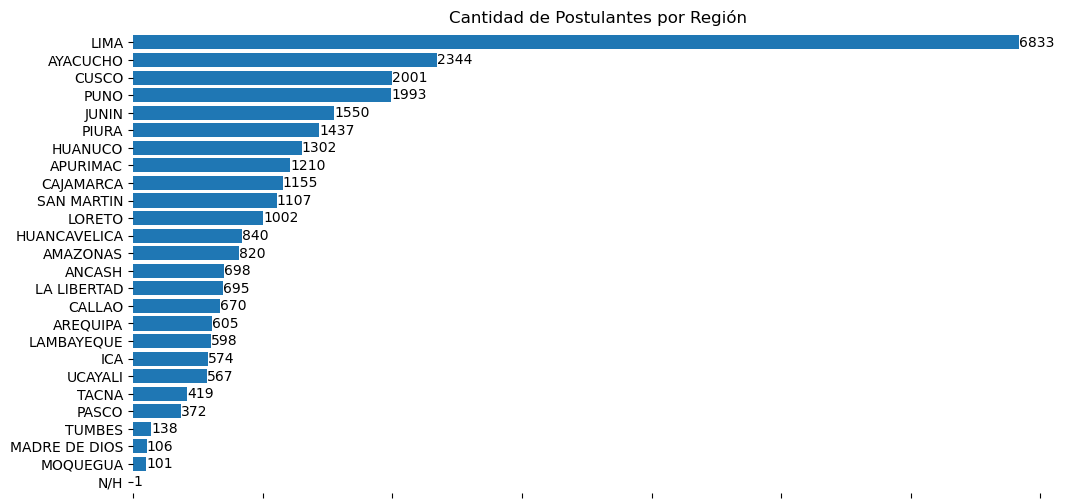

In [260]:
grafica_por_categoria(df, category='REGION', y_size=6, titulo='Cantidad de Postulantes por Región')

En general, se observa que el porcentaje de postulantes preseleccionados de Lima representa 23.45% del total de regiones. Además, se visualiza que las 3 regiones con la mayor cantidad de postulantes son Lima, Ayacucho y Cusco con 6833, 2344 y 2001, respectivamente. Por otra parte, hay regiones debajo de los 200 postulantes que son Tumbes, Madres de Dios y Moquegua con 138, 106 y 101, respectivamente. Además, se ha identificado que hay postulante que no tiene registrado el campo de REGION y se ha indicado como N/H.

##### Cantidad de Postulantes por Modalidad de Beca

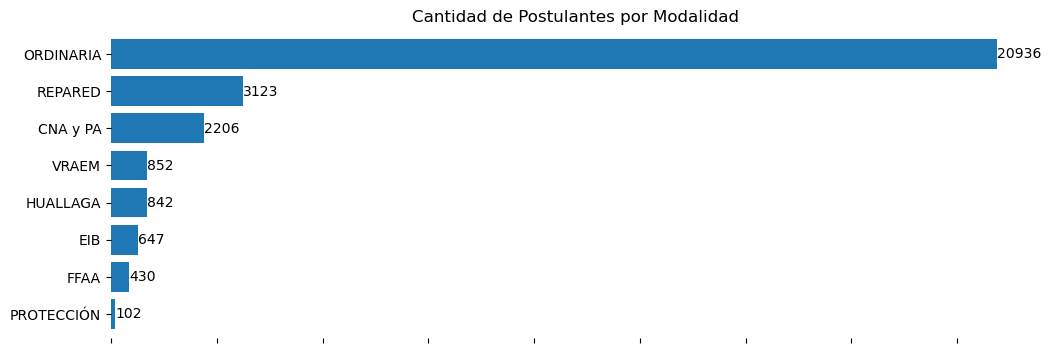

In [261]:
grafica_por_categoria(df, category='MODALIDAD', y_size=4, titulo='Cantidad de Postulantes por Modalidad')

De acuerdo a los postulantes por tipo de modalidad, se observa que la mayor parte pertenecen a la categoría de Beca 18 ORDINARIA que representa el 71.85% del total de preseleccionados de esta etapa. Mientras que las otras modalidades tienen una demanda menor como Beca FF.AA. y Beca Protección con 430 y 102 postulanes, respectivamente.

Si se evalua la oferta que tiene PRONABEC por modalidad y momento (1 y 2) se obtienen la siguiente información:
* La oferta total de Beca 18 Ordinaria es de 13800 y la demanda es de 20936 postulantes, lo cual significa que el 34.08% de preseleccionados de esta modalidad no accederán a una de las becas.
* La oferta total de Beca REPARED es de 2200 y la demanda alcanza un valor de 3123 postulantes, lo cual representa que el 29.55% de preseleccionados de esta modalidad no accederán a una de estas becas.
* La oferta total de Beca CNA Y PA es de 1460 y la demanda es de 2206. Esto significa que el 33.82% de preseleccionados de esta modalidad no alcanzarán una de las becas.
* La oferta total de Beca VRAEM es de 560 y la demanda es de 852. Esto significa que el 34.27% de preseleccionados de esta modalidad no alcanzarán una de las becas.
* La oferta total de Beca HUALLAGA es de 560 y la demanda es de 842. Esto significa que el 33.49% de preseleccionados de esta modalidad no alcanzarán una de las becas.
* La oferta total de Beca EIB es de 400 y la demanda es de 647. Esto significa que el 38.18% de preseleccionados de esta modalidad no alcanzarán una de las becas.

* En el caso de la Beca FF.AA., la oferta total es de 560 y la demanda es de 430. Esto significa que todos los preseleccionados de esta modalidad accederían a una de estas becas integrales suponiendo que todos presentan la carta de ingreso a una IES. Este es el apartado donde aparece una pregunta ¿qué sucede con las 130 becas (560-430) adicionales de esta modalidad suponiendo que los 430 ya estarían asignadas a los preseleccionados? ¿se distribuye estas becas para otras modalidades? ¿cómo se aborda está situación?
* La misma situación se preesenta para la Beca Protección, la oferta total es de 460 y la demanda solo es de 102. Esto significa que todos los preseleccionados de esta modalidad accederían a una de estas becas integrales suponiendo que todos presentan la carta de ingreso a una IES. De la misma forma, ¿qué sucede con estas 358 becas (460-102) adicionales de esta modalidad? 

##### Distribución general del Puntaje Final

In [326]:
min = df['PJ FIN'].min()
q1 = df['PJ FIN'].quantile(0.25)
q2 = df['PJ FIN'].median()
q3 = df['PJ FIN'].quantile(0.75)
max = df['PJ FIN'].max()


In [191]:
box_vls = {
    'MIN': min,
    'Q1': q1,
    'Q2': q2,
    'Q3': q3,
    'MAX': max
}

In [193]:
for box_val, value in box_vls.items():
    print(box_val,":", value)

MIN : 8
Q1 : 75.0
Q2 : 82.0
Q3 : 91.0
MAX : 131


<Axes: ylabel='PJ FIN'>

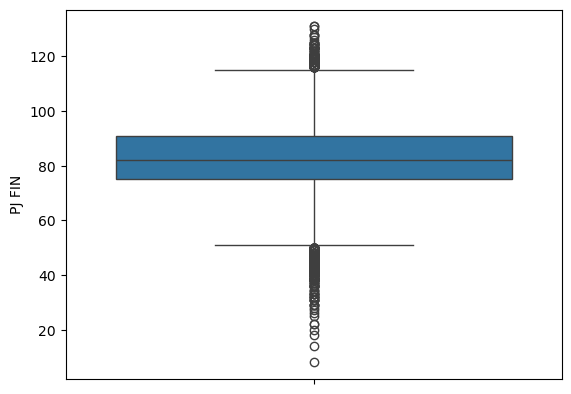

In [167]:
sns.boxplot(y='PJ FIN', data=df)

##### Distribución de Puntaje Final por Modalidad de Beca

In [321]:
min = df.groupby('MODALIDAD')['PJ FIN'].min()
q1 = df.groupby('MODALIDAD')['PJ FIN'].quantile(0.25)
q2 = df.groupby('MODALIDAD')['PJ FIN'].median()
q3 = df.groupby('MODALIDAD')['PJ FIN'].quantile(0.75)
max = df.groupby('MODALIDAD')['PJ FIN'].max()
counts = df['MODALIDAD'].value_counts()
averages = round(df.groupby('MODALIDAD')['PJ FIN'].mean(), 2)

iqr = q3 - q1
iqr_low = q1 - 1.5*iqr
iqr_sup = q3 + 1.5*iqr

In [322]:
dts = [min, iqr_low, q1, q2, q3, iqr_sup, max, iqr, counts, averages]
cols = ['MODALIDAD', 'MIN','IQR LOW', 'Q1','Q2','Q3', 'IQR SUP', 'MAX', 'IQR', 'COUNT', 'AVG']

In [323]:
box_vals = pd.concat(dts, axis=1)
box_vals.reset_index(inplace=True)
box_vals.columns = cols

In [324]:
box_vals

,MODALIDAD,MIN,IQR LOW,Q1,Q2,Q3,IQR SUP,MAX,IQR,COUNT,AVG
0,CNA y PA,8,39.500,62.00,68.0,77.00,99.500,114,15.00,2206,69.99
1,EIB,27,12.000,60.00,77.0,92.00,140.000,119,32.00,647,76.81
2,FFAA,25,29.875,55.00,63.0,71.75,96.875,108,16.75,430,64.06
3,HUALLAGA,67,50.500,73.00,79.0,88.00,110.500,120,15.00,842,81.73
4,ORDINARIA,72,53.000,77.00,84.0,93.00,117.000,131,16.00,20936,85.77
5,PROTECCIÓN,43,35.125,63.25,73.5,82.00,110.125,122,18.75,102,74.25
6,REPARED,14,31.500,63.00,73.0,84.00,115.500,131,21.00,3123,74.10
7,VRAEM,74,56.500,79.00,84.0,94.00,116.500,120,15.00,852,87.27


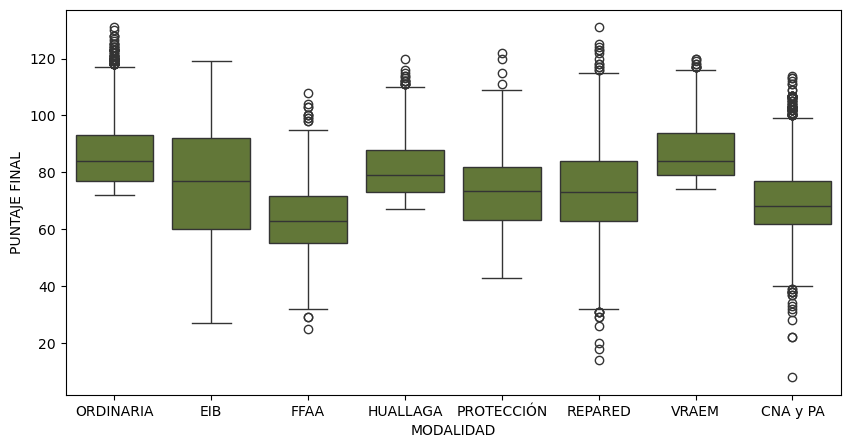

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x='MODALIDAD', y='PJ FIN', data=df, color='#66812d')
plt.xlabel('MODALIDAD')
plt.ylabel('PUNTAJE FINAL')
plt.show()

ORDINARIA:
* Mínimo: 72 | Máximo: 117 | Mediana (Q2): 84
* Tiene un rango amplio de puntajes, con una mediana de de 84, lo que indica el mejor desempeño promedio.
* Presenta varios valores atípicos en la parte superior.

EIB:
* Mínimo: 27 | Máximo: 140 | Mediana (Q2): 77
* Se encuentra entre las modalidades con mayor rango, con un límite superior bastante alto (140) y una mediana de 77 superior a CNA y PA.
* Representa una modalidad con alto desempeño promedio.

FFAA:
* Mínimo: 25 | Máximo: 108 | Mediana (Q2): 63
* Presenta una mediana más baja que las otas modalidades.
* Amplia dispersión de datos y algunos valores atípicos bajos.

HUALLAGA:
* Mínimo: 67 | Máximo: 120 | Mediana (Q2): 79
* La mediana está alrededor de 79.
* Rango intercuartílico estrecho, indicando menor variabilidad. Modalidad con buen desempeño y menor dispersión.

PROTECCIÓN:
* Mínimo: 43 | Máximo: 122 | Mediana (Q2): 73.5
* Similar a HUALLAGA, con una mediana alrededor de 73.5 y menos dispersión de datos.
* Representa a un grupo pequeño, con valores atípicos en la parte alta.

REPARED:
* Mínimo: 14 | Máximo: 131 | Mediana (Q2): 73
* Muestra una mediana un poco menor que PROTECCIÓN de 73, pero con mayor dispersión (el IQR es mayor)
* Tiene casi el mismo rango intecuartílico que PROTECCIÓN, lo cual signfica que en estas modalidades el desempeño es similar.

VRAEM:
* Mínimo: 74 | Máximo: 120 | Mediana (Q2): 84
* Muy similar a ORDINARIA en mediana y rango, pero con menor número de postulantes (852).
* Representa una modalidad competitiva en desempeño.

CNA y PA:
* Mínimo: 8 | Máximo: 114 | Mediana (Q2): 68
* La mediana es una baja que la mayoría de las modalidades, cerca de 68.
* Amplia dispersión hacia valores bajos, indicando un desempeño menor en esta modalidad.
* Son los más bajos en general, con una mediana de 68 y valores * atípicos en la parte alta (por encima de 99.5).

##### Distribución de Puntaje Final por Región

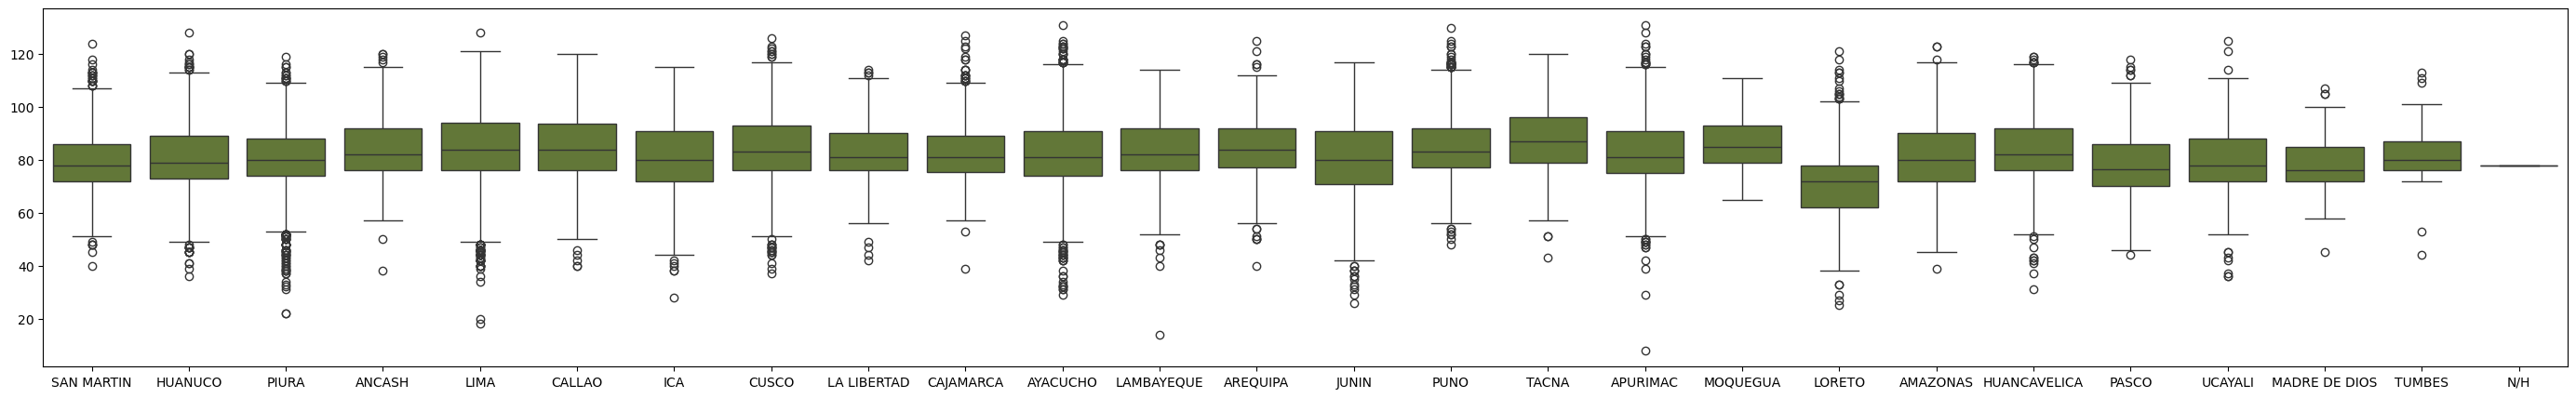

In [336]:
plt.figure(figsize=(35,5))
sns.boxplot(x='REGION', y='PJ FIN', data=df, color='#66812d')
plt.xlabel('')
plt.ylabel('')
plt.show()